In [ ]:
from sklearn import datasets

PCA Result:
         PC1       PC2  Target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0


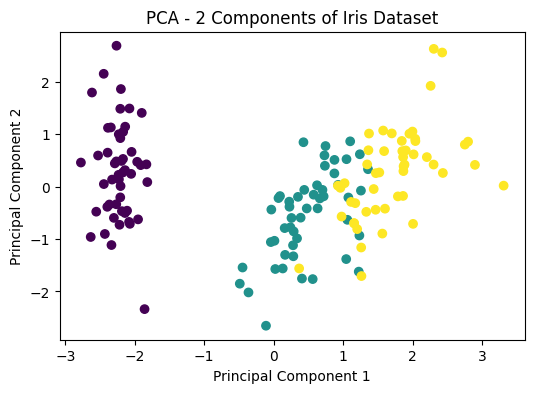

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y
print("PCA Result:\n", pca_df.head())

# Visualize
plt.figure(figsize=(6,4))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap='viridis')
plt.title('PCA - 2 Components of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving study_hours.csv to study_hours.csv


In [ ]:
import pandas as pd
df = pd.read_csv("study_hours.csv")
print(df)


   WEEK  HOURS
0     1     12
1     2     18
2     3     22
3     4     28
4     5     35


In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['WEEK']]     # Independent variable
y = df['HOURS']      # Dependent variable

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Create dataset
data = {
    'Maths': [35, 60, 45, 80, 25, 70, 55, 90, 40, 65],
    'Science': [30, 70, 50, 85, 20, 75, 45, 95, 35, 60],
    'Pass': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # 0 = Fail, 1 = Pass
}
df = pd.DataFrame(data)

# 2. Separate features & target
X = df[['Maths', 'Science']]
y = df['Pass']

# 3. Split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build & train model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# 5. User input for prediction
maths = int(input("Enter Maths marks: "))
science = int(input("Enter Science marks: "))

# 6. Prepare input as DataFrame (keep column names same)
new_data = pd.DataFrame({'Maths':[maths], 'Science':[science]})

# 7. Predict
prediction = log_model.predict(new_data)[0]

# 8. Show result
if prediction == 1:
    print("Prediction: PASS ")
else:
    print("Prediction: FAIL ")


Enter Maths marks: 345
Enter Science marks: 555
Prediction: PASS 


In [ ]:
# Install seaborn if not already
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Load from OpenML (instead of load_boston)
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame  # already a DataFrame
df.rename(columns={'MEDV':'PRICE'}, inplace=True)  # Rename target to PRICE
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (506, 14)
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


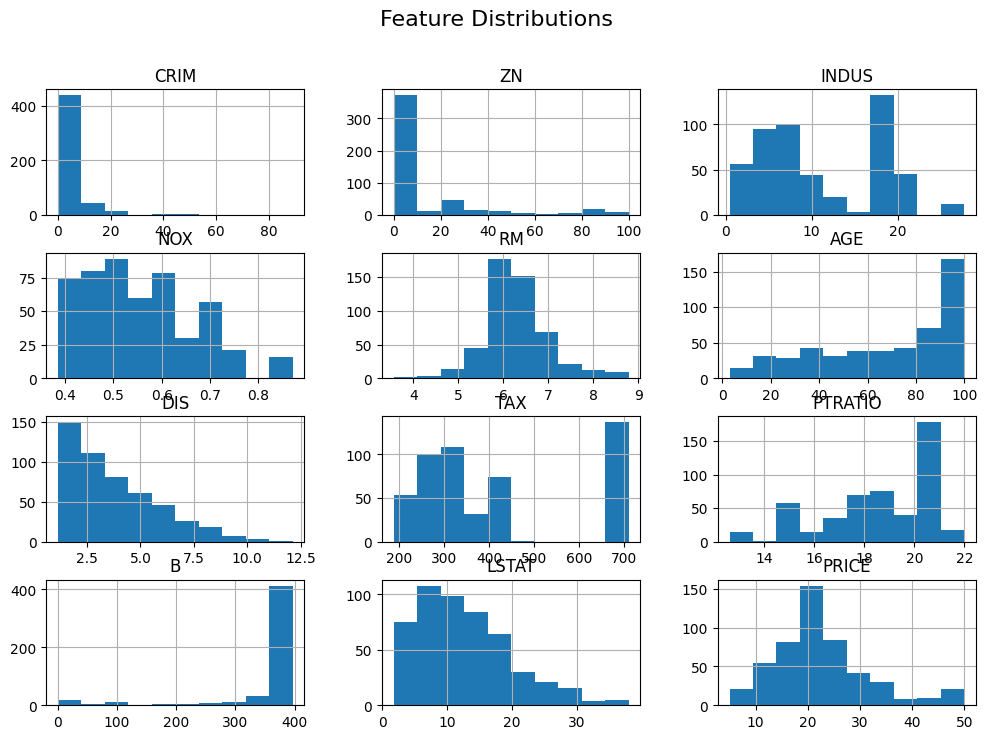

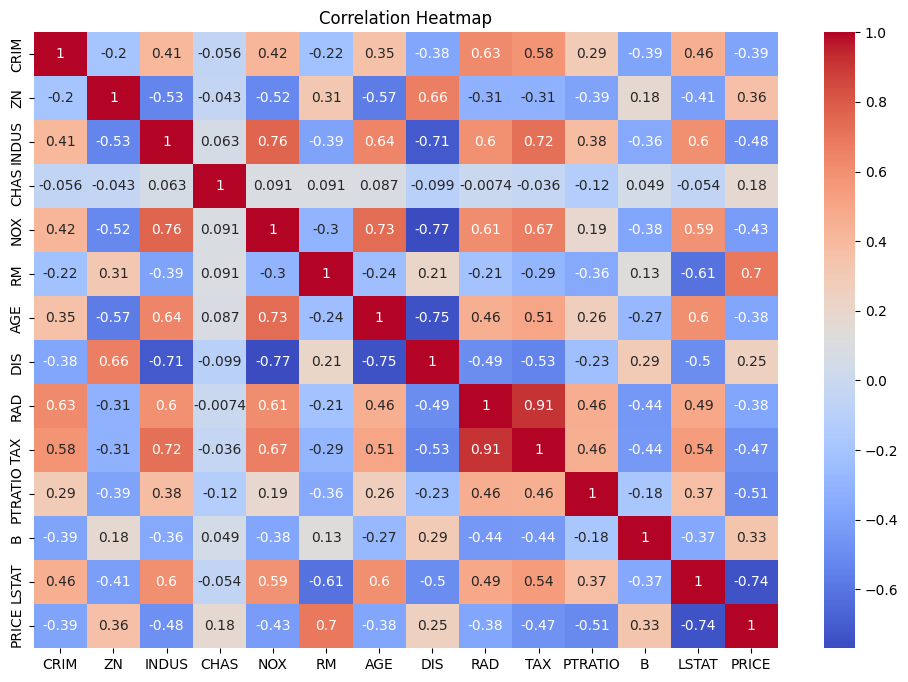

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Plot histograms for all features
df.hist(figsize=(12,8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


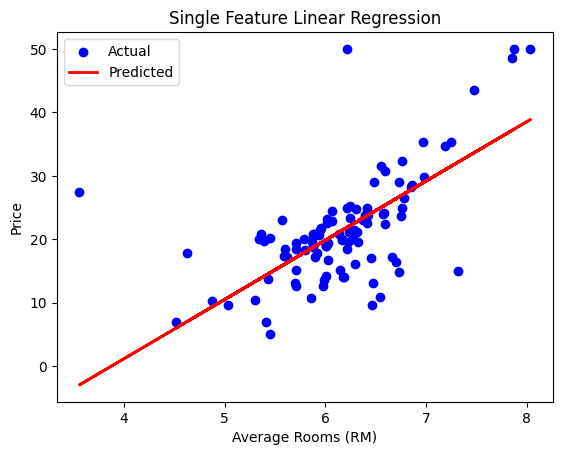

MSE: 46.144775347317264
R²: 0.3707569232254778


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use only 'RM' (average number of rooms)
X = df[['RM']]
y = df['PRICE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Plot regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Average Rooms (RM)")
plt.ylabel("Price")
plt.title("Single Feature Linear Regression")
plt.legend()
plt.show()

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


In [ ]:
import numpy as np

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values (if coercion created NaNs)
df = df.dropna()

# Features & target
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

# Predict
y_pred_multi = multi_reg.predict(X_test)

# Evaluation
mae = np.mean(np.abs(y_test - y_pred_multi))
mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_multi)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 3.19
MSE: 24.29
RMSE: 4.93
R²: 0.67


In [ ]:
# Coefficients of each feature
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": multi_reg.coef_
})
print(coef_df.sort_values(by="Coefficient", ascending=False))


    Feature  Coefficient
5        RM     4.438835
3      CHAS     2.784438
8       RAD     0.262430
2     INDUS     0.040381
1        ZN     0.030110
11        B     0.012351
6       AGE    -0.006296
9       TAX    -0.010647
0      CRIM    -0.113056
12    LSTAT    -0.508571
10  PTRATIO    -0.915456
7       DIS    -1.447865
4       NOX   -17.202633
